# 피쳐 엔지니어링

In [79]:
import pandas as pd
import numpy as np

#시각화, 한글폰트
%matplotlib inline  
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

# 맥 기본 폰트 중 사용
rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False


In [3]:
golmok_df = pd.read_csv('/Users/kimsinwoo/Downloads/골목상권_230913.csv')
not_golmok_df = pd.read_csv('/Users/kimsinwoo/Downloads/골목상권외(배후지제거)_230913.csv')

## 1. 결측치 확인

- 골목상권 결측치 확인(결측치 존재 > 처리 필요)

In [80]:
golmok_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472 entries, 0 to 2471
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   매출                      2472 non-null   float64
 1   기준_년_코드                 2472 non-null   int64  
 2   상권_구분_코드_명              2472 non-null   object 
 3   상권_코드                   2472 non-null   int64  
 4   상권_코드_명                 2472 non-null   object 
 5   시간대1                    2472 non-null   int64  
 6   시간대2                    2472 non-null   int64  
 7   시간대3                    2472 non-null   int64  
 8   시간대4                    2472 non-null   int64  
 9   시간대5                    2472 non-null   int64  
 10  분기_1                    2472 non-null   int64  
 11  분기_2                    2472 non-null   int64  
 12  분기_3                    2472 non-null   int64  
 13  area                    2472 non-null   int64  
 14  점포수                     2472 non-null   

### 골목상권 배후지 결측치 채우기

In [83]:
cols_bae = ['배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수']

In [85]:
for col in cols_bae:
    col_mean = golmok_df[col].mean()
    golmok_df[col].fillna(col_mean, inplace = True)

- 골목상권 외 결측치 확인 (결측치 없음)

In [87]:
not_golmok_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3012 entries, 0 to 3011
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   매출                  3012 non-null   float64
 1   기준_년_코드             3012 non-null   int64  
 2   상권_구분_코드_명          3012 non-null   object 
 3   상권_코드               3012 non-null   int64  
 4   상권_코드_명             3012 non-null   object 
 5   시간대1                3012 non-null   int64  
 6   시간대2                3012 non-null   int64  
 7   시간대3                3012 non-null   int64  
 8   시간대4                3012 non-null   int64  
 9   시간대5                3012 non-null   int64  
 10  분기_1                3012 non-null   int64  
 11  분기_2                3012 non-null   int64  
 12  분기_3                3012 non-null   int64  
 13  area                3012 non-null   int64  
 14  점포수                 3012 non-null   float64
 15  총 상주인구 수            3012 non-null   float64
 16  총 가구 수

- 분포

## 2. 이상치 확인

### IQR

In [77]:
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]    
    
    # 이상치 총 개수
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')
    

- 골목상권 이상치

In [98]:
gol_sel_col = golmok_df.columns[14:]
not_gol_sel_col = not_golmok_df.columns[14:]

In [96]:
gol_sel_col

Index(['점포수', '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수',
       '아파트_가격_1_억_미만_세대_수', '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수',
       '아파트_가격_3_억_세대_수', '아파트_가격_4_억_세대_수', '아파트_가격_5_억_세대_수',
       '아파트_가격_6_억_이상_세대_수', '총_생활인구_수', '시간대_생활인구_수', '월요일_생활인구_수',
       '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수', '금요일_생활인구_수', '토요일_생활인구_수',
       '일요일_생활인구_수', '집객시설_수', '관공서_수', '은행_수', '백화점_수', '숙박_시설_수',
       '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수', '연령대_40_생활인구_수',
       '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수', '배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수',
       '지하철역_수'],
      dtype='object')

In [97]:
for i in gol_sel_col:
    print(i)
    outlier_iqr(golmok_df,i)
    print('=============================')

점포수
IQR은 0.6363030666999999 이다.
lower bound 값은 -0.4449104081499998 이다.
upper bound 값은 2.10030185865 이다.
총 이상치 개수는 96 이다.
총 상주인구 수
IQR은 211.154225299075 이다.
lower bound 값은 -139.02952560018747 이다.
upper bound 값은 705.5873755961125 이다.
총 이상치 개수는 0 이다.
총 가구 수
IQR은 122.454709610875 이다.
lower bound 값은 -93.21805451048749 이다.
upper bound 값은 396.6007839330125 이다.
총 이상치 개수는 0 이다.
총_직장인구_수
IQR은 98.91596037927499 이다.
lower bound 값은 -71.12552223901247 이다.
upper bound 값은 324.53831927808744 이다.
총 이상치 개수는 288 이다.
아파트_단지_수
IQR은 5.244007844 이다.
lower bound 값은 -3.0604897844000005 이다.
upper bound 값은 17.9155415916 이다.
총 이상치 개수는 0 이다.
아파트_가격_1_억_미만_세대_수
IQR은 1.286167489375 이다.
lower bound 값은 -1.9292512340624999 이다.
upper bound 값은 3.2154187234375 이다.
총 이상치 개수는 90 이다.
아파트_가격_1_억_세대_수
IQR은 39.9026498943 이다.
lower bound 값은 -55.652534893349994 이다.
upper bound 값은 103.95806468385 이다.
총 이상치 개수는 0 이다.
아파트_가격_2_억_세대_수
IQR은 24.8425343197 이다.
lower bound 값은 -29.624819755849998 이다.
upper bound 값은 69.74531752294999 이다.
총 

In [99]:
for i in not_gol_sel_col :
    print(i)
    outlier_iqr(not_golmok_df,i)
    print('=============================')

점포수
IQR은 1.0208974575999998 이다.
lower bound 값은 -0.7640238854999998 이다.
upper bound 값은 3.3195659449 이다.
총 이상치 개수는 96 이다.
총 상주인구 수
IQR은 75.8979083939 이다.
lower bound 값은 -58.37357862045 이다.
upper bound 값은 245.21805495514997 이다.
총 이상치 개수는 222 이다.
총 가구 수
IQR은 50.9928921844 이다.
lower bound 값은 -46.643759976199995 이다.
upper bound 값은 157.32780876139998 이다.
총 이상치 개수는 132 이다.
총_직장인구_수
IQR은 346.52438499510004 이다.
lower bound 값은 -178.10832349425004 이다.
upper bound 값은 1207.98921648615 이다.
총 이상치 개수는 432 이다.
아파트_단지_수
IQR은 1.7415840238000002 이다.
lower bound 값은 -1.9385669932000007 이다.
upper bound 값은 5.027769102000001 이다.
총 이상치 개수는 144 이다.
아파트_가격_1_억_미만_세대_수
IQR은 0.3368999811 이다.
lower bound 값은 -0.5053499716500001 이다.
upper bound 값은 0.84224995275 이다.
총 이상치 개수는 384 이다.
아파트_가격_1_억_세대_수
IQR은 12.1501560028 이다.
lower bound 값은 -17.848871099999997 이다.
upper bound 값은 30.751752911199997 이다.
총 이상치 개수는 24 이다.
아파트_가격_2_억_세대_수
IQR은 11.1174901306 이다.
lower bound 값은 -15.5979460095 이다.
upper bound 값은 28.872014512899998 

데이터가 적은 상황에서이상치를 제거하게 되면, 상권코드별 시간대별 분기면 매출을 전부 제거해야 하므로, 이상치를 모두 제거하는 것에 위험성이 큼.
따라서 분포를 확인한 뒤, 이상치를 제거하는 방향보다는 로그변환으로 데이터의 정규성을 높이는 방향으로 진행 예정

### 분포
- 히스토그램 함수

In [113]:
def plot_histograms(df):
    num_columns = len(df.columns)

    # 한 줄에 최대 4개의 그래프
    num_plots_per_row = 4
    num_rows = (num_columns + num_plots_per_row - 1) // num_plots_per_row  # 행 수 계산
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_plots_per_row, figsize=(16, 20)) 

    for i, column in enumerate(df.columns):
        row_idx = i // num_plots_per_row
        col_idx = i % num_plots_per_row
        ax = axes[row_idx, col_idx]
        df[column].plot(kind='hist', ax=ax, title=column) 
        ax.set_xlabel(column) # x축 레이블

    # 남은 서브플롯 삭제
    for i in range(num_columns, num_rows * num_plots_per_row):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

In [114]:
sel_golmok_df = golmok_df[gol_sel_col]
sel_not_golmak_df = not_golmok_df[not_gol_sel_col]

- 골목상권 분포

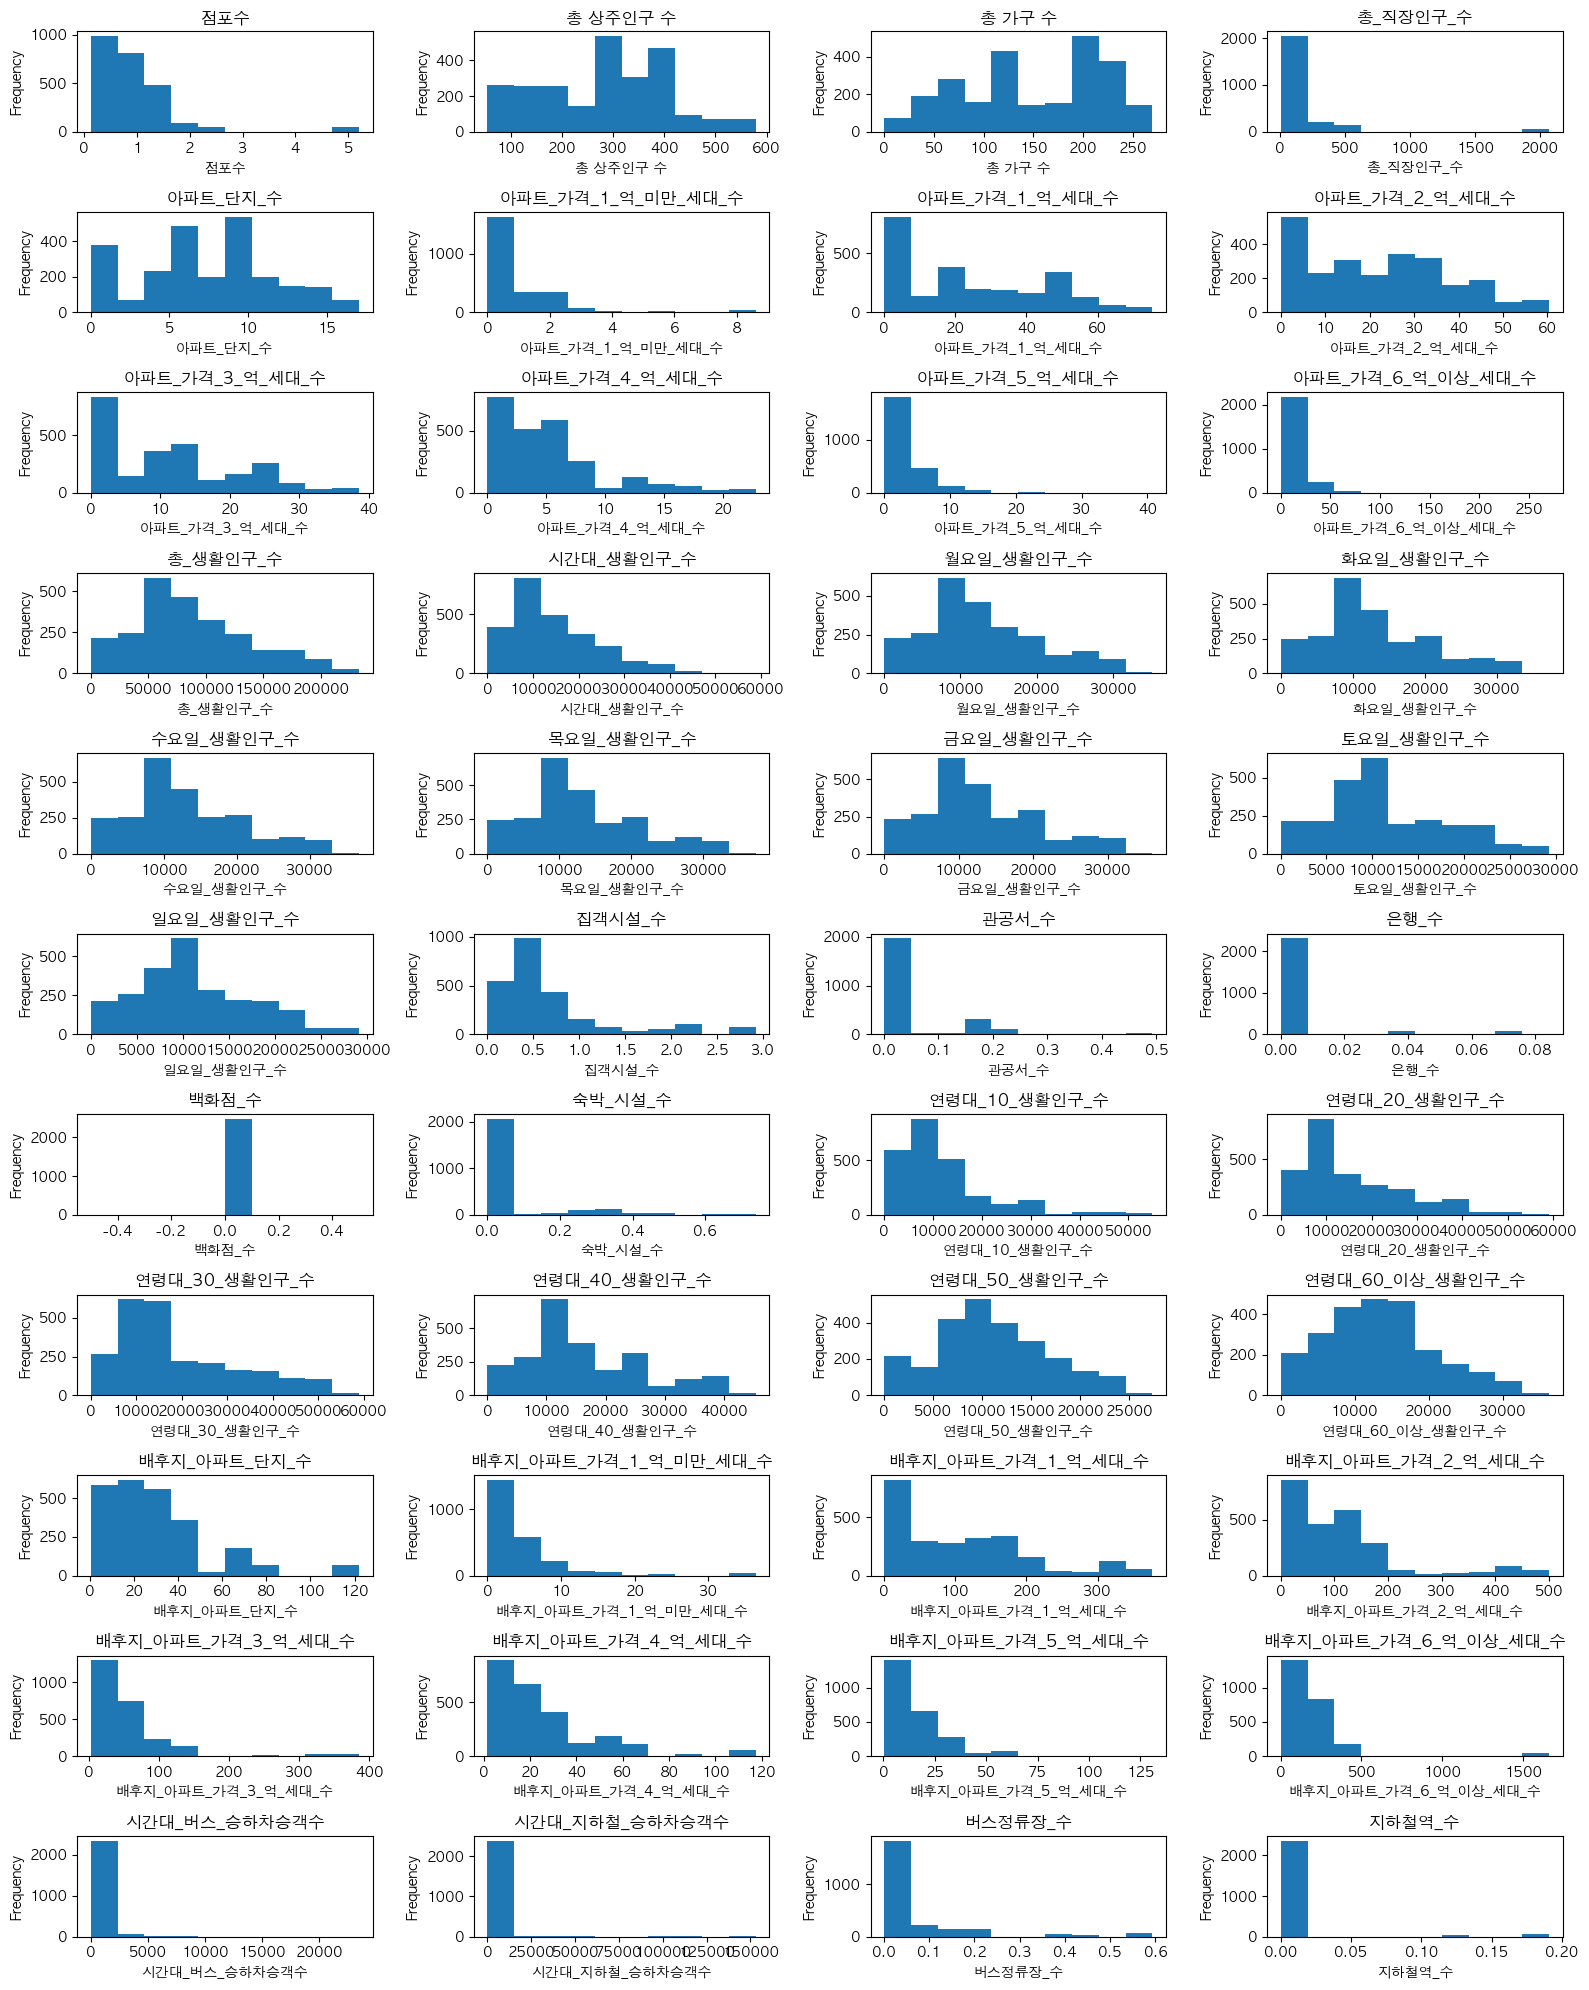

In [115]:
plot_histograms(sel_golmok_df)

- 골목상권 외 분포

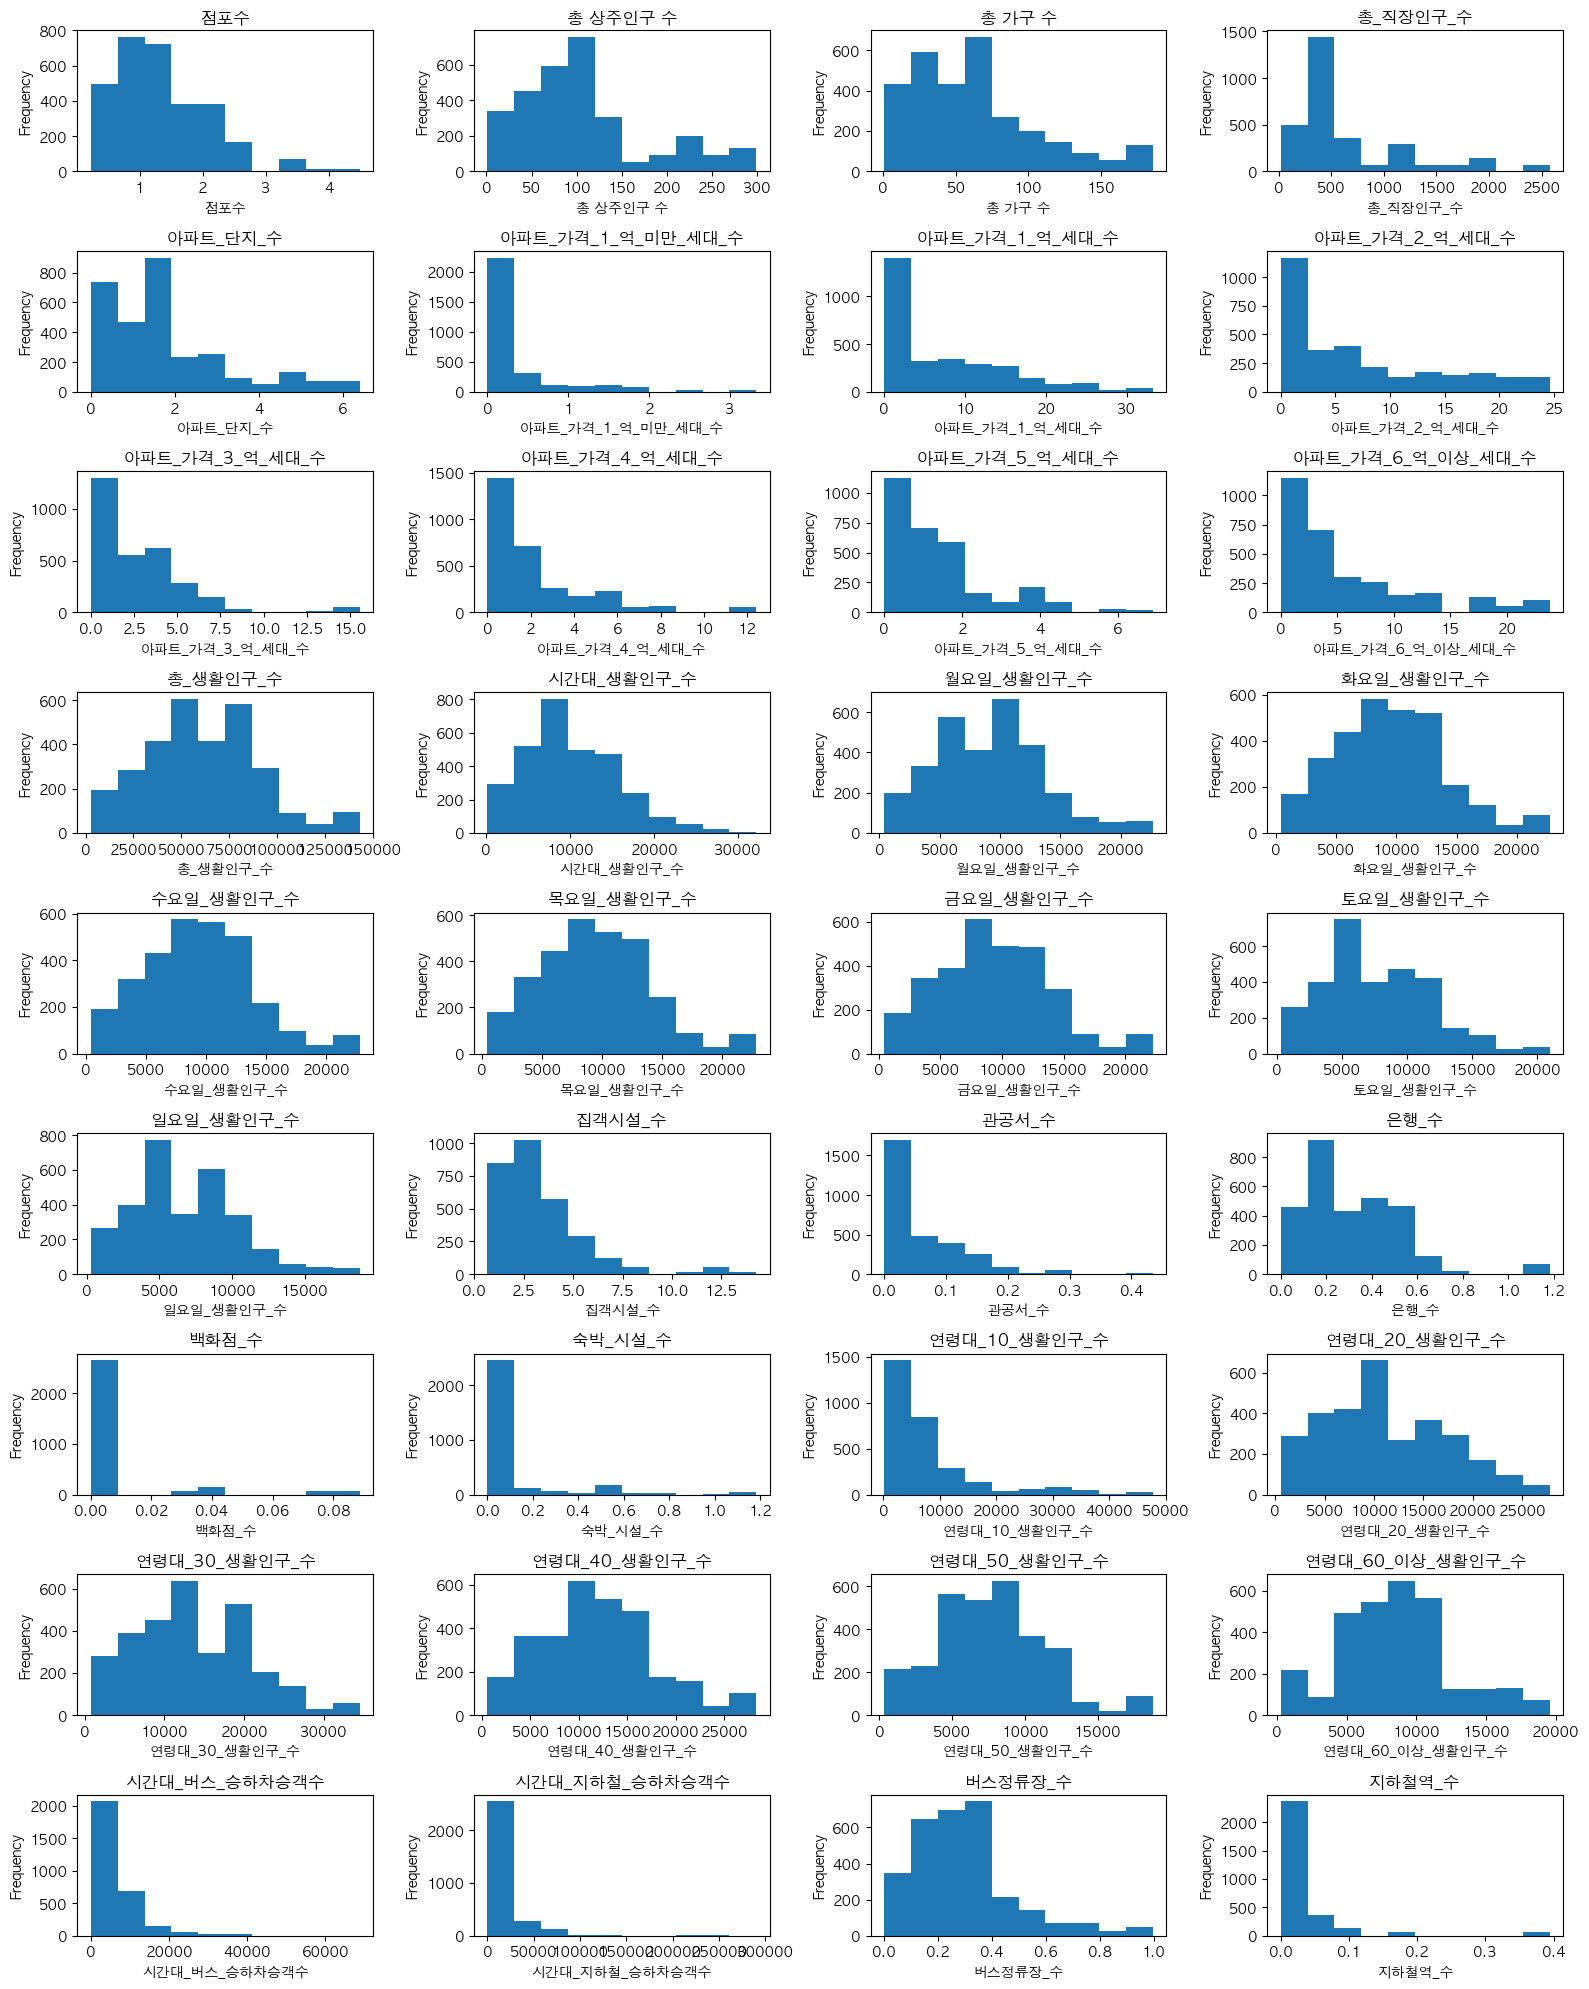

In [116]:
plot_histograms(sel_not_golmak_df)